In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
list=["policy_number","policy_bind_date","policy_csl","insured_occupation","insured_hobbies","insured_relationship","incident_date","authorities_contacted","incident_state","incident_city","1ncident_location","incident_hour_of_the_day","auto_make","auto_model","auto_year"]

In [5]:
df.drop(list,axis=1,inplace=True)

In [6]:
df.shape

(1000, 24)

**Exploratory Data Analysis**

In [7]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

***Check for duplicates***

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape 

(1000, 24)

There is no change in shape so there are no duplicates

***Check for null values***

In [11]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [14]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

All the null values are rectified

***Separate categorical and numerical column***

In [15]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

In [16]:
categorical_cols

['policy_state',
 'insured_sex',
 'insured_education_level',
 'incident_type',
 'collision_type',
 'incident_severity',
 'property_damage',
 'police_report_available',
 'fraud_reported']

In [17]:
numerical_cols

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

***check for outliers***

months_as_customer                Axes(0.125,0.747241;0.227941x0.132759)
age                            Axes(0.398529,0.747241;0.227941x0.132759)
policy_deductable              Axes(0.672059,0.747241;0.227941x0.132759)
policy_annual_premium             Axes(0.125,0.587931;0.227941x0.132759)
umbrella_limit                 Axes(0.398529,0.587931;0.227941x0.132759)
insured_zip                    Axes(0.672059,0.587931;0.227941x0.132759)
capital-gains                     Axes(0.125,0.428621;0.227941x0.132759)
capital-loss                   Axes(0.398529,0.428621;0.227941x0.132759)
number_of_vehicles_involved    Axes(0.672059,0.428621;0.227941x0.132759)
bodily_injuries                    Axes(0.125,0.26931;0.227941x0.132759)
witnesses                       Axes(0.398529,0.26931;0.227941x0.132759)
total_claim_amount              Axes(0.672059,0.26931;0.227941x0.132759)
injury_claim                          Axes(0.125,0.11;0.227941x0.132759)
property_claim                     Axes(0.398529,0.

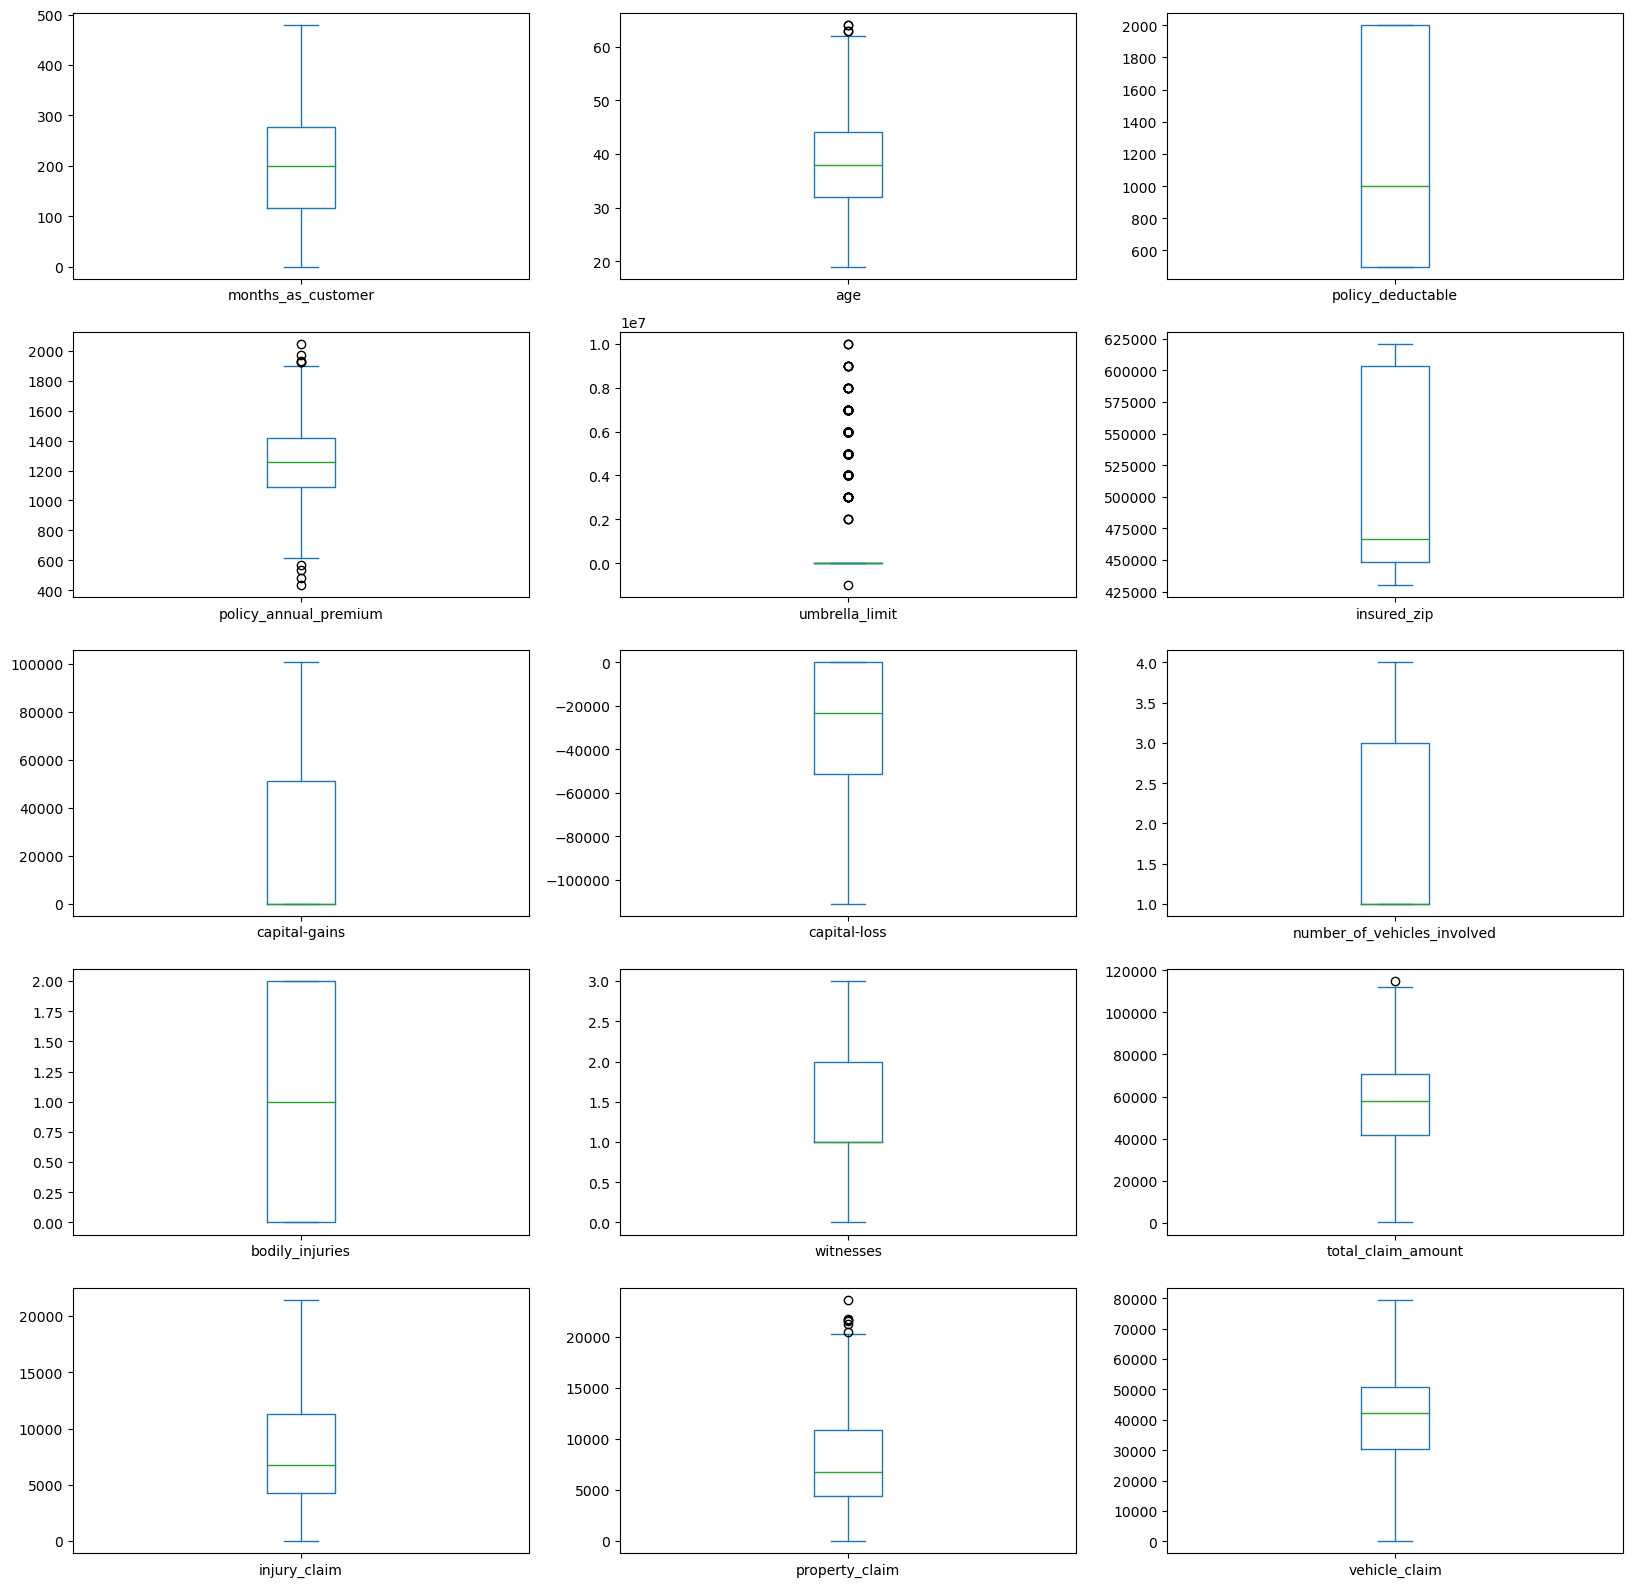

In [18]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

In [19]:
for i in df[numerical_cols]:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

-125.0
517.0
14.0
62.0
-1750.0
4250.0
600.4762499999999
1904.8262500000003
0.0
0.0
216134.75
835520.75
-76537.5
127562.5
-128750.0
77250.0
-2.0
6.0
-3.0
5.0
-0.5
3.5
-1357.5
113762.5
-6220.0
21820.0
-5215.0
20545.0
-502.5
81617.5


months_as_customer                Axes(0.125,0.747241;0.227941x0.132759)
age                            Axes(0.398529,0.747241;0.227941x0.132759)
policy_deductable              Axes(0.672059,0.747241;0.227941x0.132759)
policy_annual_premium             Axes(0.125,0.587931;0.227941x0.132759)
umbrella_limit                 Axes(0.398529,0.587931;0.227941x0.132759)
insured_zip                    Axes(0.672059,0.587931;0.227941x0.132759)
capital-gains                     Axes(0.125,0.428621;0.227941x0.132759)
capital-loss                   Axes(0.398529,0.428621;0.227941x0.132759)
number_of_vehicles_involved    Axes(0.672059,0.428621;0.227941x0.132759)
bodily_injuries                    Axes(0.125,0.26931;0.227941x0.132759)
witnesses                       Axes(0.398529,0.26931;0.227941x0.132759)
total_claim_amount              Axes(0.672059,0.26931;0.227941x0.132759)
injury_claim                          Axes(0.125,0.11;0.227941x0.132759)
property_claim                     Axes(0.398529,0.

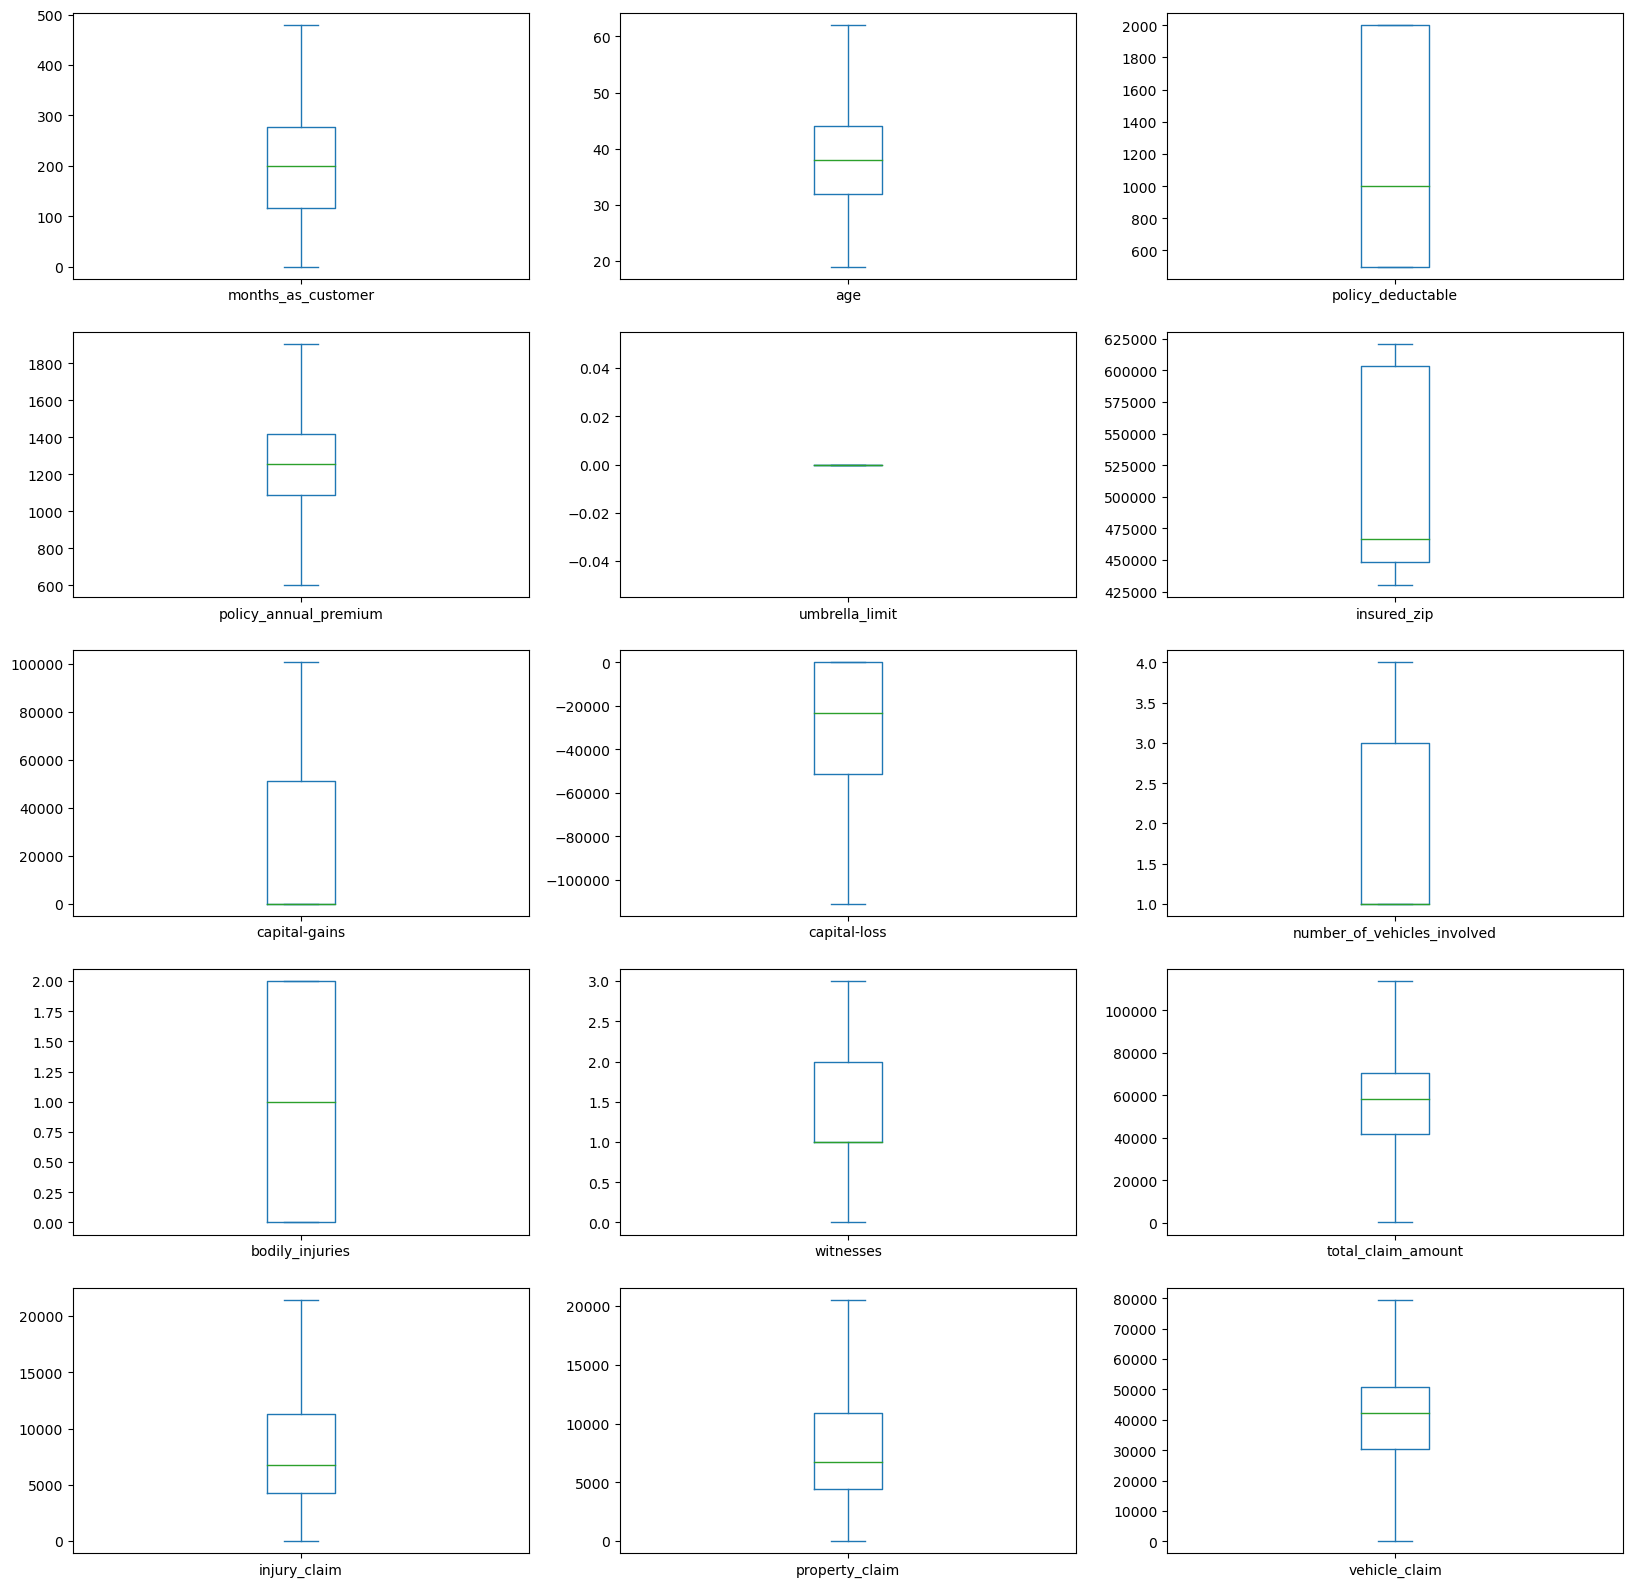

In [20]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

So the outliers which are present in some of the features are also removed

***check for skewness***

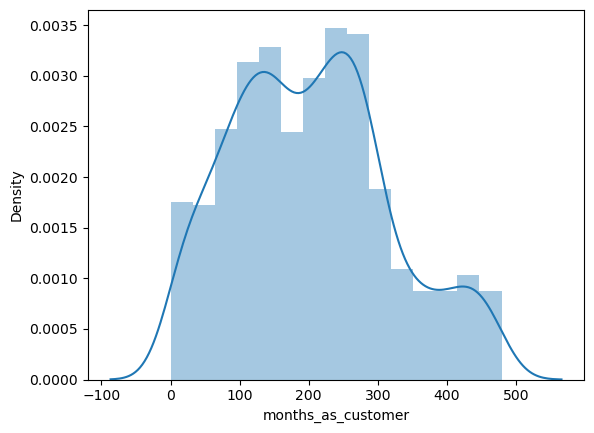

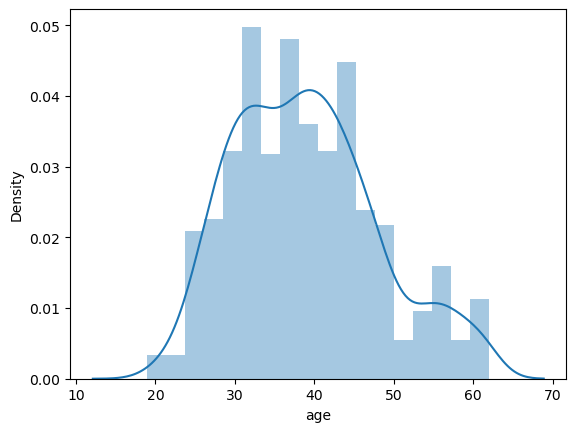

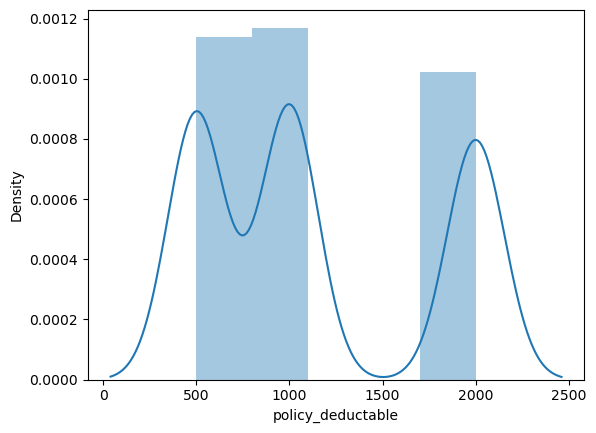

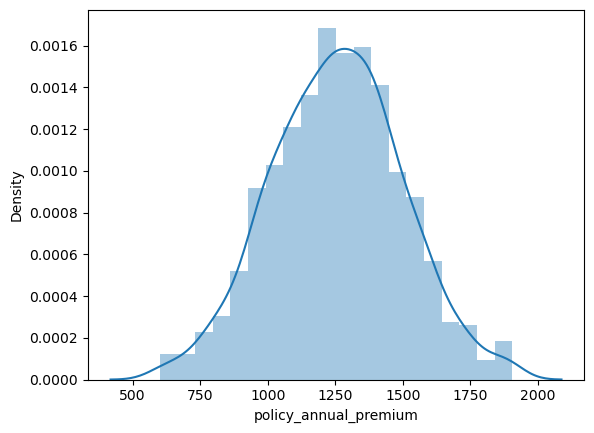

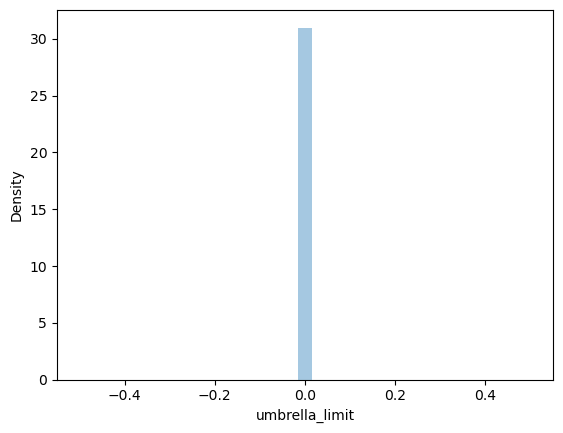

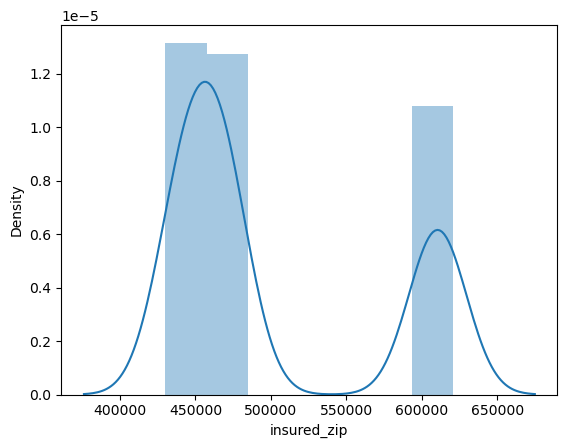

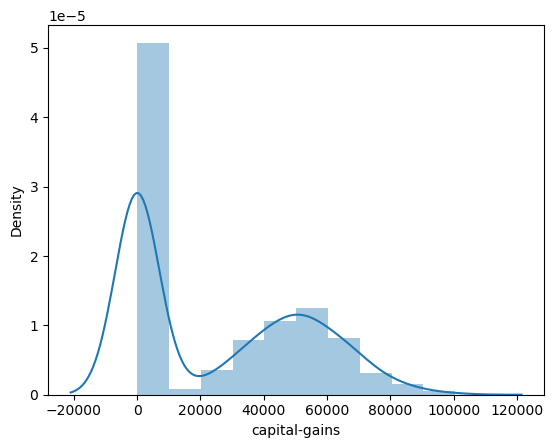

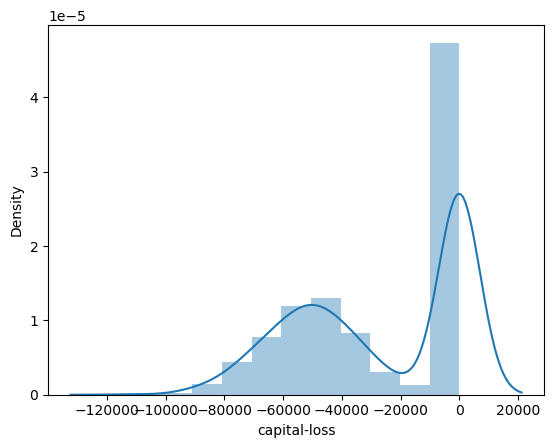

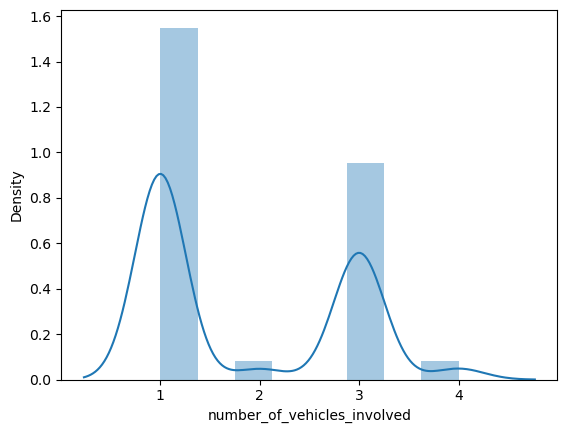

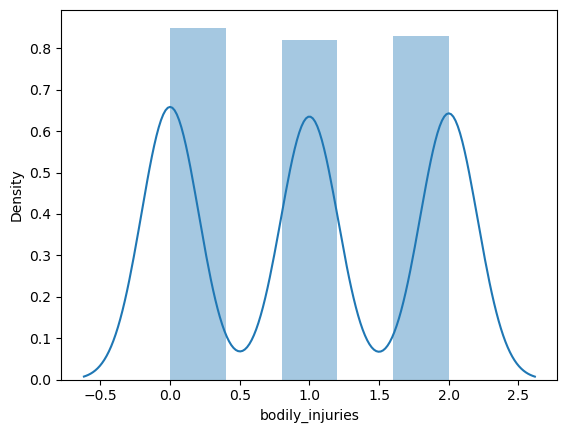

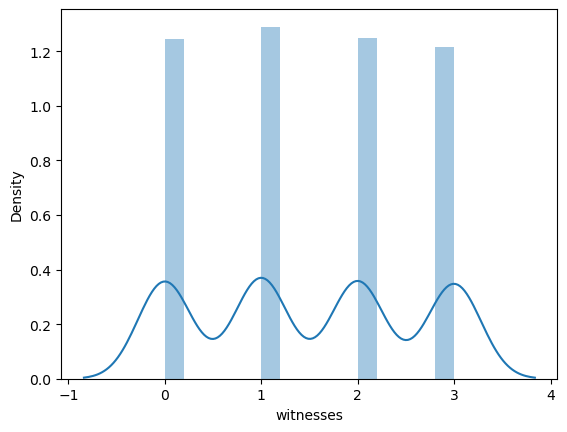

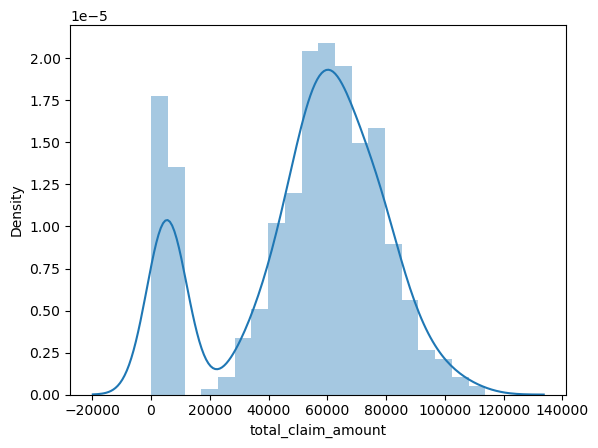

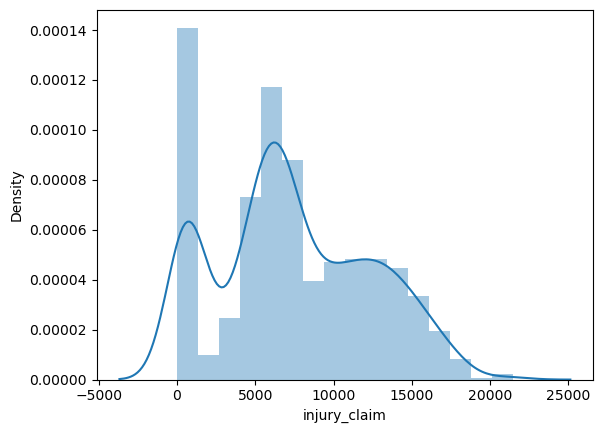

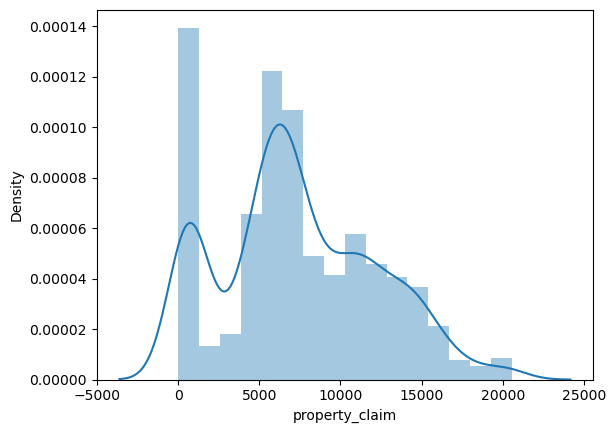

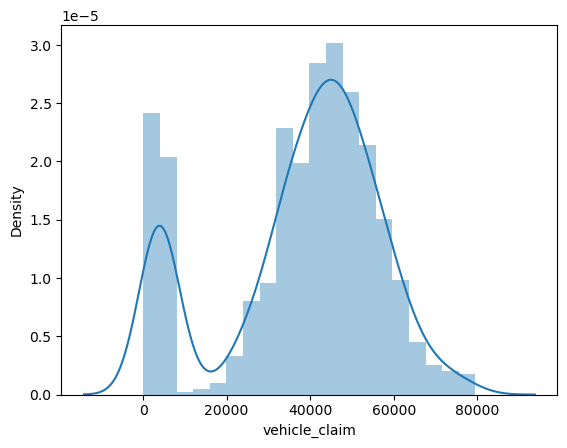

In [21]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [22]:
for i in numerical_cols:
    df[i] = np.sqrt(df[i])

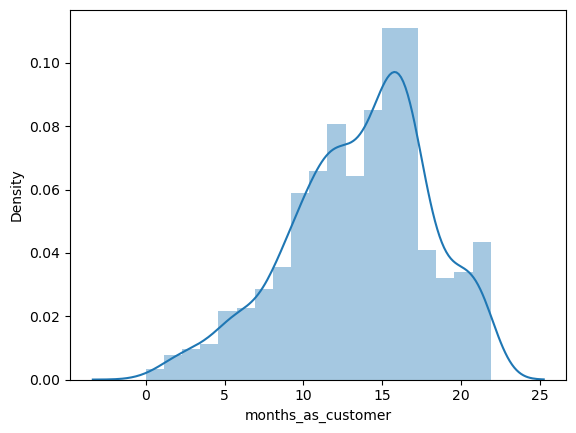

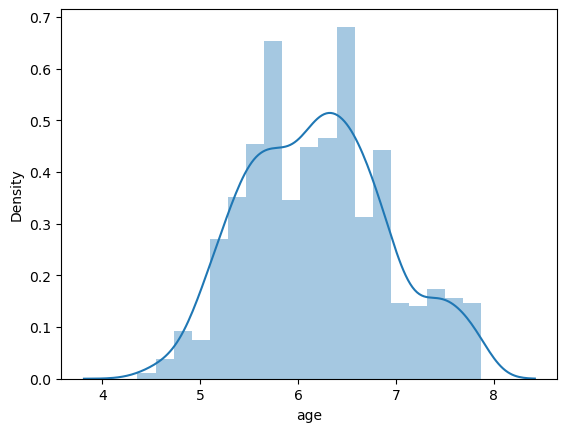

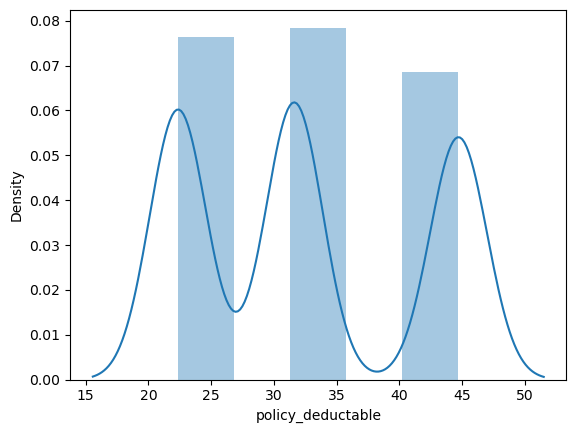

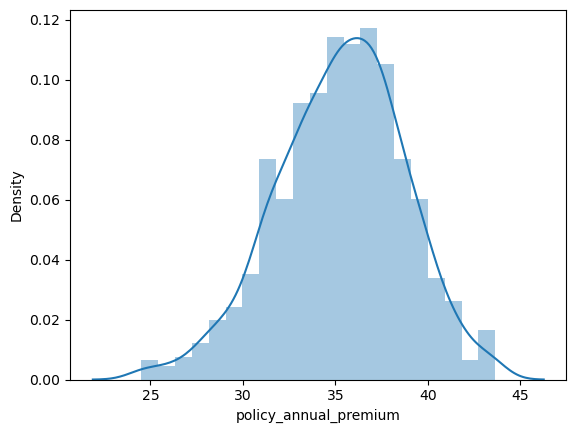

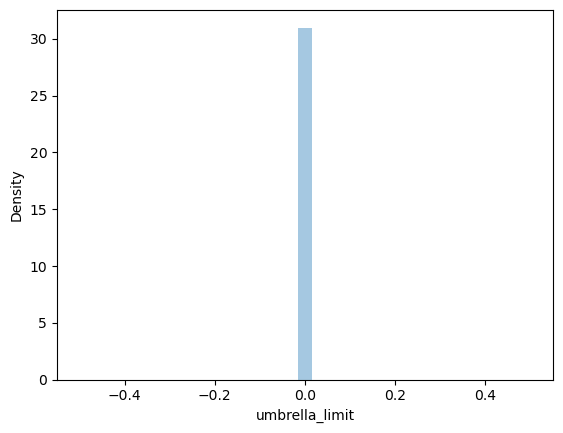

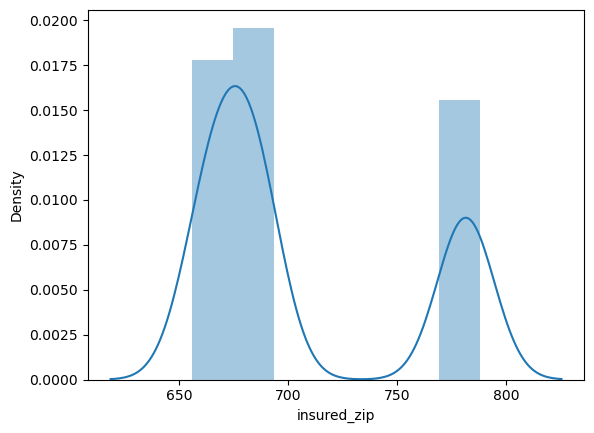

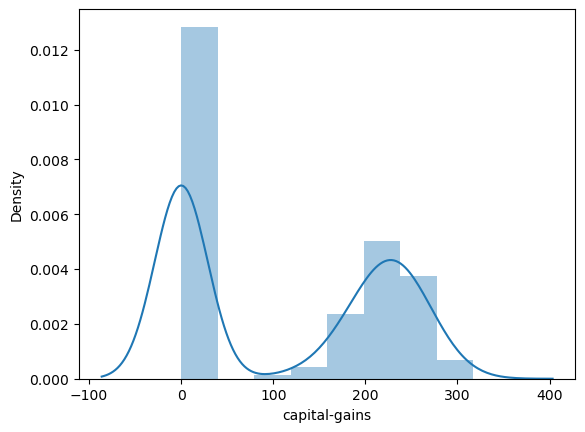

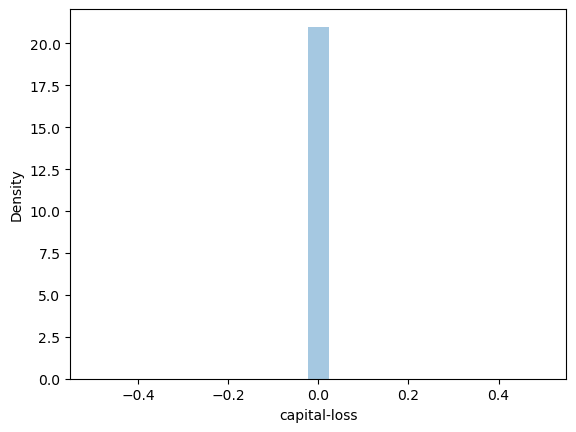

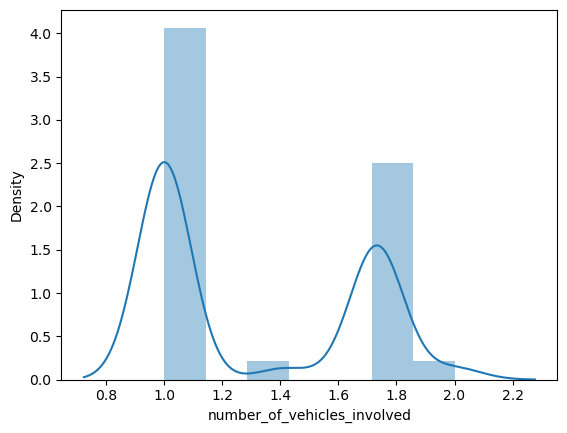

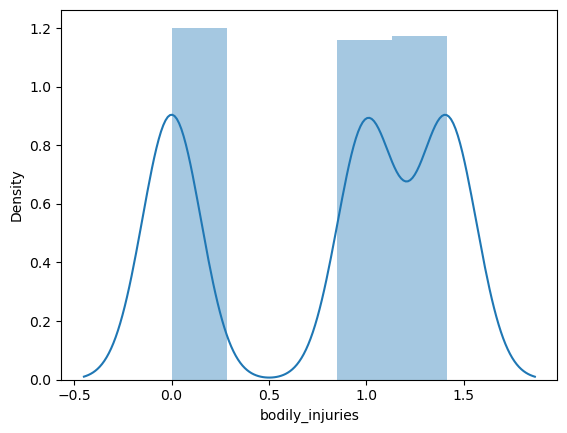

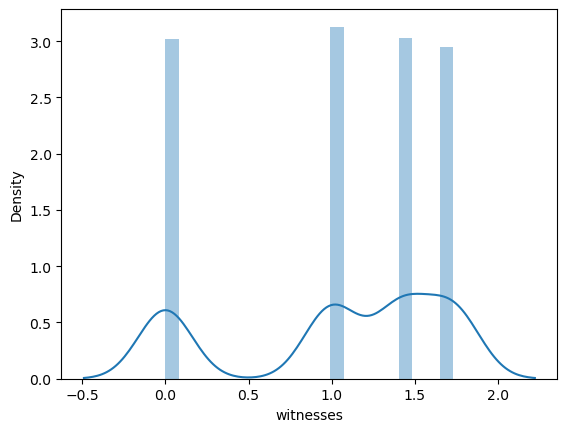

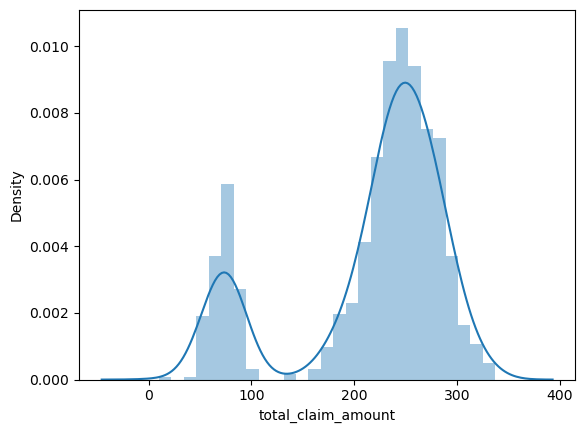

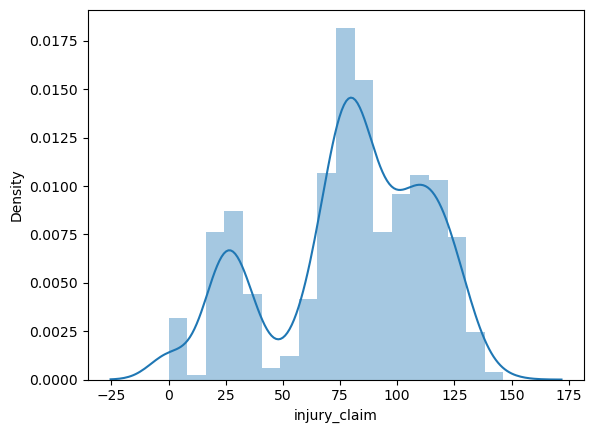

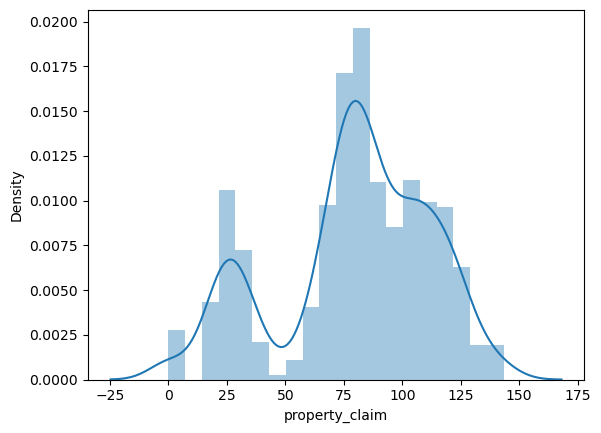

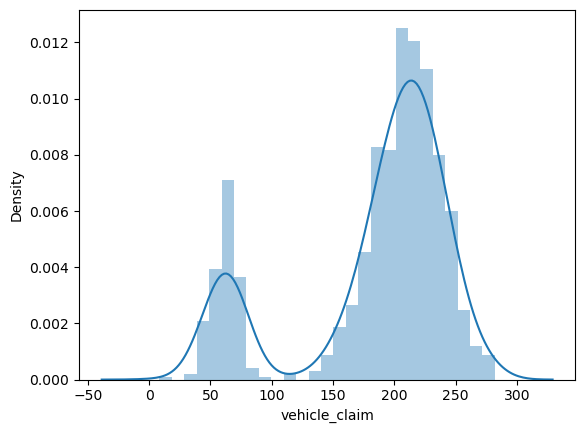

In [23]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

In [24]:
df.drop('umbrella_limit',axis=1,inplace=True)

Skewness is managed

***Encoding of categorical column***

As the catrgorical data is nominal we can use nominal encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,18.110770,6.928203,2,31.622777,37.508799,682.738603,1,4,230.867928,0.0,...,1.000000,2,1.000000,1.414214,2,267.600448,80.684571,114.105215,228.210429,1
1,15.099669,6.480741,1,44.721360,34.600867,684.233878,1,4,0.000000,0.0,...,1.000000,0,0.000000,0.000000,0,71.203932,27.928480,27.928480,59.245253,1
2,11.575837,5.385165,2,44.721360,37.591754,656.225571,0,6,187.349940,0.0,...,1.732051,1,1.414214,1.732051,1,186.145105,87.749644,62.048368,151.986842,0
3,16.000000,6.403124,0,44.721360,37.626321,779.818569,0,6,221.133444,NaN,...,1.000000,0,1.000000,1.414214,1,251.793566,79.624117,79.624117,225.211012,1
4,15.099669,6.633250,0,31.622777,39.798367,781.476807,1,0,256.904652,NaN,...,1.000000,1,0.000000,1.000000,1,80.622577,36.055513,25.495098,67.453688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.732051,6.164414,2,31.622777,36.204972,656.725970,0,5,0.000000,0.0,...,1.000000,2,0.000000,1.000000,0,295.296461,132.060592,93.380940,247.062745,0
996,16.881943,6.403124,0,31.622777,37.905013,779.857038,0,6,266.270539,0.0,...,1.000000,2,1.414214,1.732051,0,329.363022,134.461891,134.461891,268.923781,0
997,11.401754,5.830952,2,22.360680,37.195295,665.429936,0,5,187.349940,0.0,...,1.732051,0,1.414214,1.732051,2,259.807621,86.602540,86.602540,229.128785,0
998,21.400935,7.874008,0,44.721360,36.836395,664.615678,1,0,0.000000,0.0,...,1.000000,0,0.000000,1.000000,2,216.748702,72.249567,72.249567,191.154388,0


In [30]:
df.drop('capital-loss',axis=1,inplace=True)

***Check for Correlation between feautures***

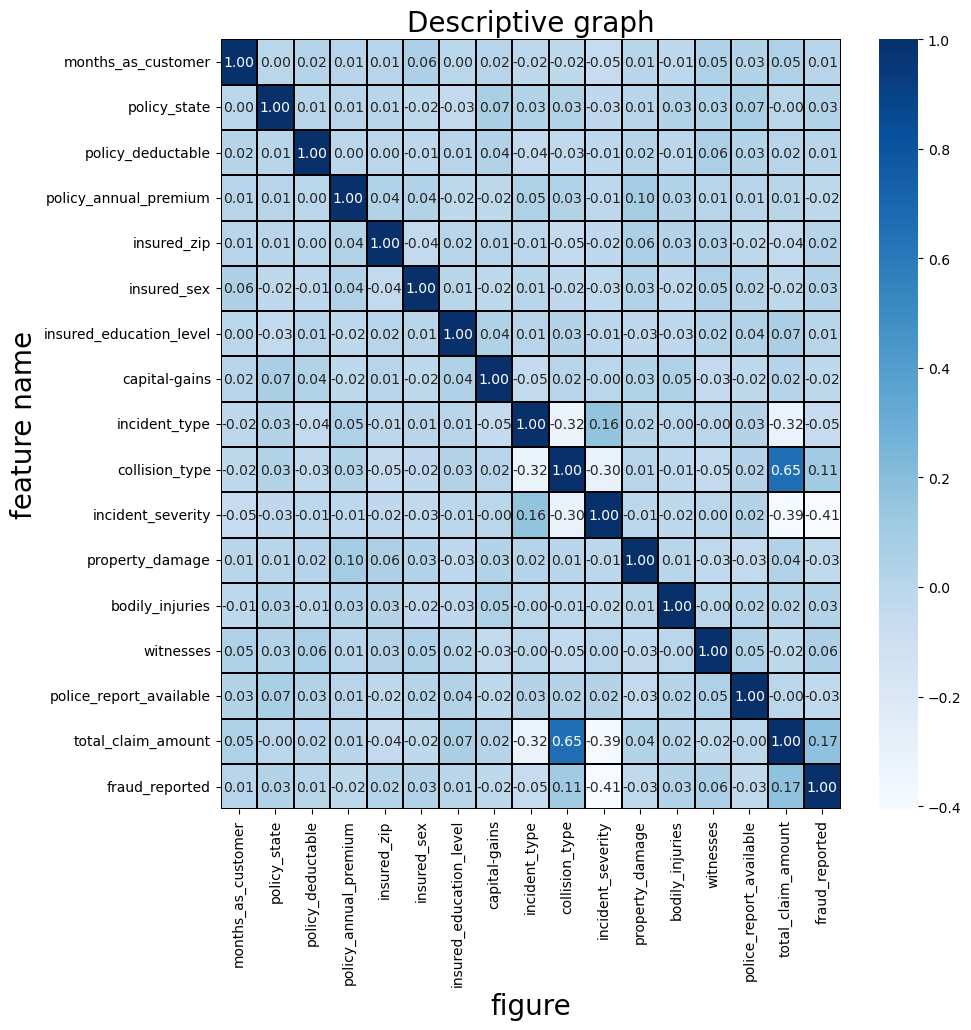

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing of VIF 
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [40]:
calc_vif(df)

,Variables,VIF FACTOR
0,months_as_customer,9.954967
1,policy_state,2.524645
2,policy_deductable,13.054478
3,policy_annual_premium,37.132951
4,insured_sex,1.879763
5,insured_education_level,3.330942
6,capital-gains,1.942265
7,incident_type,2.483700
8,collision_type,6.364679
9,incident_severity,3.381106


In [34]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
correlation(df,0.7)

{'age',
 'injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'}

In [36]:
df.drop(['age',
 'injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'],axis=1,inplace=True)

In [39]:
df.drop(['insured_zip'],axis=1,inplace=True)

We can see most of the features are highly correlated with each other so some features must be dropped to prevent overfitting

So correlation between features are rectified

***Checking of correlation with the target***

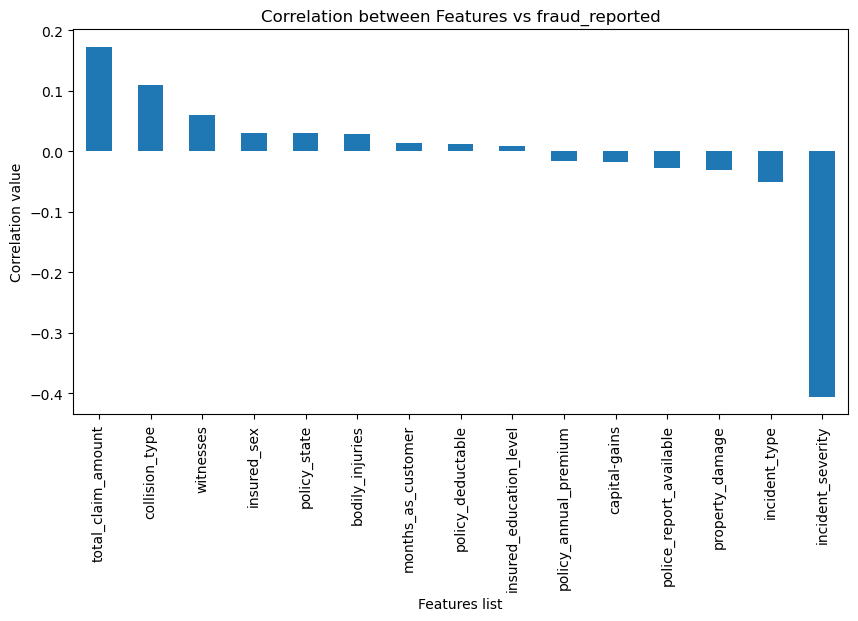

In [42]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation between Features vs fraud_reported")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [43]:
df.drop(['policy_deductable','insured_education_level'],axis=1,inplace=True)

***Splitting of data into features and target***

In [44]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [45]:
x

,months_as_customer,policy_state,policy_annual_premium,insured_sex,capital-gains,incident_type,collision_type,incident_severity,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount
0,18.110770,2,37.508799,1,230.867928,2,3,0,2,1.000000,1.414214,2,267.600448
1,15.099669,1,34.600867,1,0.000000,3,0,1,0,0.000000,0.000000,0,71.203932
2,11.575837,2,37.591754,0,187.349940,0,2,1,1,1.414214,1.732051,1,186.145105
3,16.000000,0,37.626321,0,221.133444,2,1,0,0,1.000000,1.414214,1,251.793566
4,15.099669,0,39.798367,1,256.904652,3,0,1,1,0.000000,1.000000,1,80.622577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.732051,2,36.204972,0,0.000000,2,1,1,2,0.000000,1.000000,0,295.296461
996,16.881943,0,37.905013,0,266.270539,2,2,0,2,1.414214,1.732051,0,329.363022
997,11.401754,2,37.195295,0,187.349940,0,3,1,0,1.414214,1.732051,2,259.807621
998,21.400935,0,36.836395,1,0.000000,2,2,0,0,0.000000,1.000000,2,216.748702


***imbalance data converting into balance data***

fraud_reported
0    753
1    247
Name: count, dtype: int64


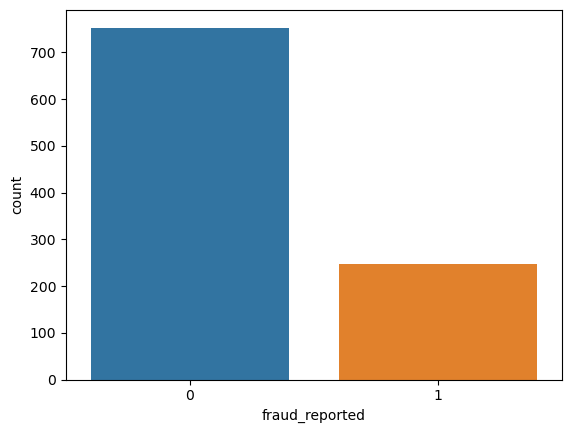

In [47]:
ax=sns.countplot(x='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())

In [48]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [49]:
x,y=sm.fit_resample(x,y)

In [50]:
y.value_counts()

fraud_reported
1    753
0    753
Name: count, dtype: int64

***Scaling or standardization of parameters***

In [51]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 1.04522121,  1.36848171,  0.65475871, ...,  0.6018646 ,
         1.4854768 ,  0.62379354],
       [ 0.34023877,  0.11715599, -0.22173835, ..., -1.73403889,
        -1.1188632 , -2.26338448],
       [-0.48478813,  1.36848171,  0.6797628 , ...,  1.12684693,
         0.1833068 , -0.57366191],
       ...,
       [ 0.51610404, -1.13416972,  0.65603293, ...,  0.30061895,
        -1.1188632 ,  0.00275931],
       [-1.31980233,  1.36848171,  0.62315647, ...,  0.11320435,
        -1.1188632 ,  0.00958277],
       [-0.02004955, -1.13416972,  0.8769761 , ..., -0.91441702,
         0.1833068 ,  0.70620819]])

***Find the best random score***

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV


In [53]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.8488063660477454
random state  383


In [54]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=383)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [55]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.8488063660477454
Confusion matrix :
 [[159  30]
 [ 27 161]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       189
           1       0.84      0.86      0.85       188

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377

cross validation score  0.7902290378649535
The final result of accuracy minus cross validation is  0.05857732818279193


In [56]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.8143236074270557
Confusion matrix :
 [[150  39]
 [ 31 157]]
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       189
           1       0.80      0.84      0.82       188

    accuracy                           0.81       377
   macro avg       0.81      0.81      0.81       377
weighted avg       0.81      0.81      0.81       377

cross validation score  0.7842929748520385
The final result of accuracy minus cross validation is  0.030030632575017147


In [57]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.896551724137931
Confusion matrix :
 [[171  18]
 [ 21 167]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       189
           1       0.90      0.89      0.90       188

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377

cross validation score  0.8546764647642517
The final result of accuracy minus cross validation is  0.04187525937367931


In [58]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy score 0.8779840848806366
Confusion matrix :
 [[171  18]
 [ 28 160]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       189
           1       0.90      0.85      0.87       188

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377

cross validation score  0.8380805702844822
The final result of accuracy minus cross validation is  0.03990351459615438


In [59]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy score 0.883289124668435
Confusion matrix :
 [[172  17]
 [ 27 161]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       189
           1       0.90      0.86      0.88       188

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377

cross validation score  0.8454027414138302
The final result of accuracy minus cross validation is  0.037886383254604805


In [60]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy score 0.8037135278514589
Confusion matrix :
 [[126  63]
 [ 11 177]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.67      0.77       189
           1       0.74      0.94      0.83       188

    accuracy                           0.80       377
   macro avg       0.83      0.80      0.80       377
weighted avg       0.83      0.80      0.80       377

cross validation score  0.6972343842819739
The final result of accuracy minus cross validation is  0.10647914356948496


In [61]:
clf=SVC()
classify(clf,X,y)

Accuracy score 0.8647214854111406
Confusion matrix :
 [[166  23]
 [ 28 160]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       189
           1       0.87      0.85      0.86       188

    accuracy                           0.86       377
   macro avg       0.86      0.86      0.86       377
weighted avg       0.86      0.86      0.86       377

cross validation score  0.5776748586389739
The final result of accuracy minus cross validation is  0.28704662677216664


According to our requirements we have to check whose precision is better with better accuracy score for 1.

So out of the above models the KNeighborsClassifier gives the best results,the recall value is high for this model the hyperparamter tuning is done.

***Hyperparameter tuning***

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=383)
model = KNeighborsClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}


# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (accuracy):", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Best score (accuracy): 0.7936597836774828


In [65]:
best_model=KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='uniform')
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=383)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
print("Classification report :\n",classification_report(y_test,pred))

Accuracy score 0.8381962864721485
Confusion matrix :
 [[152  37]
 [ 24 164]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       189
           1       0.82      0.87      0.84       188

    accuracy                           0.84       377
   macro avg       0.84      0.84      0.84       377
weighted avg       0.84      0.84      0.84       377



In [66]:
from sklearn.metrics import roc_auc_score

In [67]:
y_pred_prob=best_model.predict_proba(x_test)[:,1]

In [68]:
y_pred_prob

array([0.5 , 0.75, 0.  , 1.  , 0.25, 0.75, 0.5 , 0.25, 0.5 , 0.25, 0.  ,
       1.  , 0.75, 0.25, 0.25, 1.  , 0.75, 0.5 , 0.75, 0.75, 0.5 , 0.75,
       0.25, 0.25, 0.  , 1.  , 0.5 , 1.  , 0.75, 0.  , 1.  , 1.  , 0.75,
       0.25, 0.5 , 0.25, 0.25, 0.25, 0.  , 1.  , 0.25, 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.5 , 0.75, 0.75, 0.25, 1.  , 1.  , 0.75, 1.  , 0.5 ,
       0.  , 0.75, 1.  , 0.25, 0.25, 0.5 , 1.  , 0.75, 0.75, 0.75, 1.  ,
       0.5 , 1.  , 1.  , 0.5 , 0.75, 1.  , 0.5 , 0.25, 1.  , 0.75, 1.  ,
       0.5 , 0.  , 0.  , 0.25, 0.25, 0.25, 0.5 , 0.75, 1.  , 1.  , 1.  ,
       0.  , 0.25, 0.  , 0.5 , 0.75, 0.75, 1.  , 0.5 , 1.  , 0.75, 0.75,
       0.75, 0.25, 0.75, 0.25, 0.75, 0.  , 0.  , 0.75, 0.25, 0.  , 0.5 ,
       0.25, 0.75, 0.5 , 1.  , 1.  , 0.  , 0.25, 1.  , 0.  , 0.75, 1.  ,
       0.5 , 0.25, 0.5 , 0.  , 1.  , 0.25, 0.25, 1.  , 0.25, 0.75, 0.75,
       0.5 , 0.  , 1.  , 0.75, 0.75, 1.  , 0.75, 0.75, 0.5 , 1.  , 0.  ,
       0.75, 0.75, 0.25, 1.  , 0.25, 0.  , 1.  , 0.

In [69]:
from sklearn.metrics import roc_curve

In [70]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

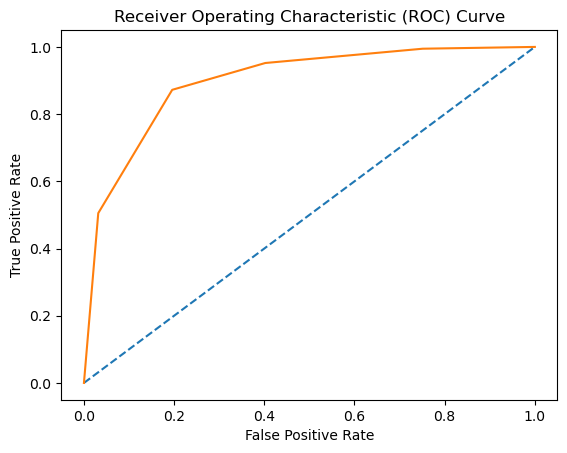

In [71]:
plt.plot([0, 1], [0, 1],linestyle='--')
plt.plot(fpr,tpr,label="AdaBoostClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

So the curve is nice ...It is performing well

In [72]:
import joblib

joblib.dump(best_model, 'fraud.joblib')

['fraud.joblib']

In [73]:
x

,months_as_customer,policy_state,policy_annual_premium,insured_sex,capital-gains,incident_type,collision_type,incident_severity,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount
0,18.110770,2,37.508799,1,230.867928,2,3,0,2,1.000000,1.414214,2,267.600448
1,15.099669,1,34.600867,1,0.000000,3,0,1,0,0.000000,0.000000,0,71.203932
2,11.575837,2,37.591754,0,187.349940,0,2,1,1,1.414214,1.732051,1,186.145105
3,16.000000,0,37.626321,0,221.133444,2,1,0,0,1.000000,1.414214,1,251.793566
4,15.099669,0,39.798367,1,256.904652,3,0,1,1,0.000000,1.000000,1,80.622577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,11.779945,1,34.216296,1,224.921484,0,2,0,0,0.748950,1.494007,0,251.496080
1502,14.172680,2,33.890122,0,230.568445,0,3,1,0,1.286122,1.633763,2,271.116315
1503,15.850820,0,37.513026,1,185.472370,0,3,0,0,0.791524,1.231832,0,225.355406
1504,8.009347,2,37.403953,0,237.890648,1,2,0,1,1.347239,1.118367,0,225.819563


In [74]:
loaded_model = joblib.load('fraud.joblib')

In [75]:
t=np.array([11.575837,2,37.591754,0,187.349940,0,2,1,1,1.414214,1.732051,1,186.145105])
t=t.reshape(1,-1)
loaded_model.predict(t) 

array([0])

You can see the model is giving the perfect result.